In [1]:
import os
import numpy as np
import argparse
import matplotlib.pyplot as plt
import pandas as pd

from torchvision import datasets,transforms
from torchvision.utils import save_image, make_grid
from torch.utils.data import DataLoader,Dataset
from torch.utils.data import Sampler, BatchSampler, RandomSampler
from torch.autograd import Variable
from collections import Counter

import torch.nn as nn
import torch.nn.functional as F
import torchvision,torch

class MyDataset(Dataset):
    def __init__(self, X, Y):
        self.x = X.values
        self.y = Y
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return (self.x[idx], self.y[idx])

df=pd.read_csv('D:/mac归档/研究生小论文和毕设/毕业论文/data/bank customer Churn.csv')
print(df)

df=df.sample(frac=1).reset_index(drop=True)
print(df)
#训练结果，是否流失
result_var='Exited'
#分类型数据，需要预处理
cat_names=['Gender','Geography']
#数值型数据，可直接输入模型
cont_names=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
#看一下分类类型数据的数量和分布情况
for col in df.columns:
    if col in cat_names:
        ccol=Counter(df[col])
        print(col,len(ccol),ccol)

#标签
Y=df['Exited'].astype('int')
#类别变量变为独热编码，总的有4个类别变量
one_hot=pd.DataFrame(columns=['Female','Male','France','Germany','Spain','HasCrCard_Yes','HasCrCard_No','IsActiveMember_Yes','IsActiveMember_No'],index=[i for i in range(10000)])
one_hot.loc[df.Gender=='Female','Female']=1
one_hot.loc[df.Gender=='Male','Female']=0
one_hot.loc[df.Gender=='Male','Male']=1
one_hot.loc[df.Gender=='Female','Male']=0
one_hot.loc[df.Geography=='France','France']=1
one_hot.loc[df.Geography!='France','France']=0
one_hot.loc[df.Geography=='Germany','Germany']=1
one_hot.loc[df.Geography!='Germany','Germany']=0
one_hot.loc[df.Geography=='Spain','Spain']=1
one_hot.loc[df.Geography!='Spain','Spain']=0
one_hot.loc[df.HasCrCard==1,'HasCrCard_Yes']=1
one_hot.loc[df.HasCrCard==0,'HasCrCard_Yes']=0
one_hot.loc[df.HasCrCard==1,'HasCrCard_No']=0
one_hot.loc[df.HasCrCard==0,'HasCrCard_No']=1
one_hot.loc[df.IsActiveMember==1,'IsActiveMember_Yes']=1
one_hot.loc[df.IsActiveMember==0,'IsActiveMember_Yes']=0
one_hot.loc[df.IsActiveMember==1,'IsActiveMember_No']=0
one_hot.loc[df.IsActiveMember==0,'IsActiveMember_No']=1

X=pd.concat([df[cont_names],one_hot],axis=1).astype('float')

train_set=DataLoader(MyDataset(X,Y),batch_size=8,shuffle=False)
len(train_set)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

1250

c:\users\m1070\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\m1070\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\m1070\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

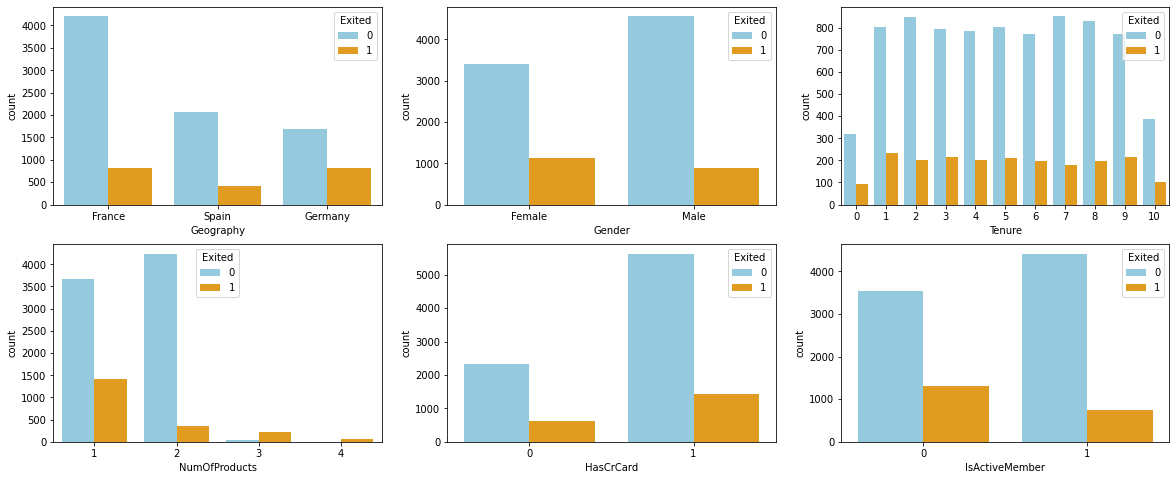

In [201]:
import os
import numpy as np
import argparse
import matplotlib.pyplot as plt
import pandas as pd

from torchvision import datasets,transforms
from torchvision.utils import save_image, make_grid
from torch.utils.data import DataLoader,Dataset
from torch.utils.data import Sampler, BatchSampler, RandomSampler
from torch.autograd import Variable
from collections import Counter

import torch.nn as nn
import torch.nn.functional as F
import torchvision,torch

import seaborn as sns

df=pd.read_csv('D:/mac归档/研究生小论文和毕设/毕业论文/data/bank customer Churn.csv')

#训练结果，是否流失
result_var='Exited'
#分类型数据，需要预处理
cat_names=['Gender','Geography']
#数值型数据，可直接输入模型
cont_names=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

'''plt.figure(figsize=(6,6))
df.Exited.value_counts().plot(ylabel='',title='',kind='pie', autopct='%1.2f%%', colors=['skyblue', 'orange'], explode=(0.0, 0.05),labels=['No',' Yes'],fontsize=15)
plt.savefig('客户流失比例.png')
plt.close()'''

data=df
#preparing the figure size 
fig, axarr = plt.subplots(2, 3, figsize=(20, 8))

#visulazie the count of Exited and NotExited for each feature

sns.countplot('Geography', hue = 'Exited',data = data, ax = axarr[0][0],palette=['skyblue', 'orange'])
sns.countplot('Gender', hue = 'Exited',data = data, ax = axarr[0][1],palette=['skyblue', 'orange'])
sns.countplot('Tenure', hue = 'Exited',data = data, ax = axarr[0][2],palette=['skyblue', 'orange'])
sns.countplot('NumOfProducts', hue = 'Exited',data = data, ax = axarr[1][0],palette=['skyblue', 'orange'])
sns.countplot('HasCrCard', hue = 'Exited',data = data, ax = axarr[1][1],palette=['skyblue', 'orange'])
sns.countplot('IsActiveMember', hue = 'Exited',data = data, ax = axarr[1][2],palette=['skyblue', 'orange'])
plt.savefig('各特征和是否流失关系图.png',dpi=300)

c:\users\m1070\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:156: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


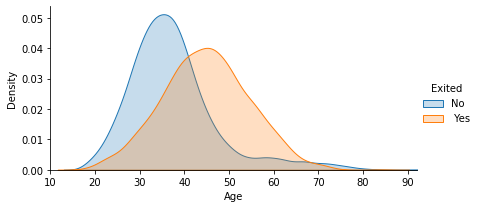

In [176]:
FacetGrid = sns.FacetGrid(data, hue='Exited', aspect=2,)
FacetGrid.map(sns.kdeplot, 'Age', shade=True )
FacetGrid.set(xlim=(10, data['Age'].max()))
FacetGrid.add_legend(labels = ['No', " Yes"])
plt.savefig('客户年龄分布_1.png',dpi=300)

c:\users\m1070\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:156: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


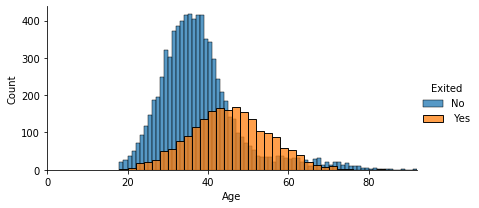

In [175]:
FacetGrid = sns.FacetGrid(data, hue='Exited', aspect=2)
FacetGrid.map(sns.histplot, 'Age')
FacetGrid.set(xlim=(0, data['Age'].max()))
FacetGrid.add_legend(labels = ['No', " Yes"])
plt.savefig('客户年龄分布_2.png',dpi=300)

c:\users\m1070\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:156: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


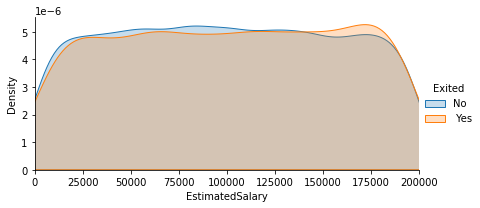

In [191]:
FacetGrid = sns.FacetGrid(data, hue='Exited', aspect=2,)
FacetGrid.map(sns.kdeplot, 'EstimatedSalary', shade=True )
FacetGrid.set(xlim=(0, 200000))
FacetGrid.add_legend(labels = ['No', " Yes"])
plt.savefig('客户收入分布_1.png',dpi=300)

c:\users\m1070\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:156: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


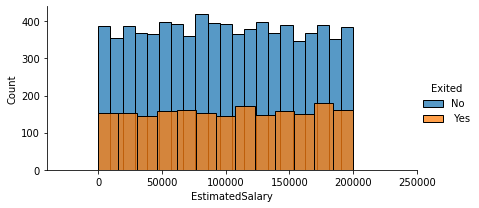

In [185]:
FacetGrid = sns.FacetGrid(data, hue='Exited', aspect=2,)
FacetGrid.map(sns.histplot, 'EstimatedSalary')
FacetGrid.set(xlim=(-40000, 250000))
FacetGrid.add_legend(labels = ['No', " Yes"])
plt.savefig('客户收入分布_2.png',dpi=300)

c:\users\m1070\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:156: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


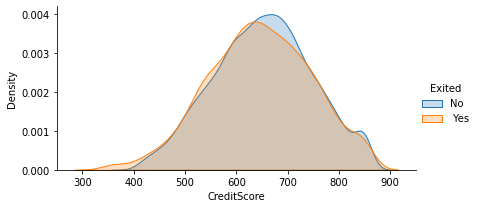

In [172]:
FacetGrid = sns.FacetGrid(data, hue='Exited', aspect=2,)
FacetGrid.map(sns.kdeplot, 'CreditScore', shade=True )
FacetGrid.set(xlim=(250, 950))
FacetGrid.add_legend(labels = ['No', " Yes"])
plt.savefig('客户信用评分分布_1.png',dpi=300)

c:\users\m1070\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:156: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


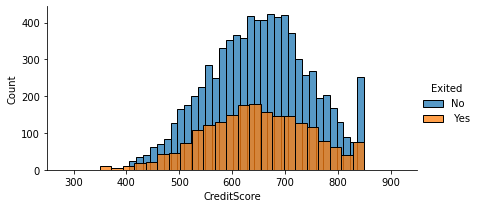

In [171]:
FacetGrid = sns.FacetGrid(data, hue='Exited', aspect=2,)
FacetGrid.map(sns.histplot, 'CreditScore')
FacetGrid.set(xlim=(250, 950))
FacetGrid.add_legend(labels = ['No', " Yes"])
plt.savefig('客户信用评分分布_2.png',dpi=300)

c:\users\m1070\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:156: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


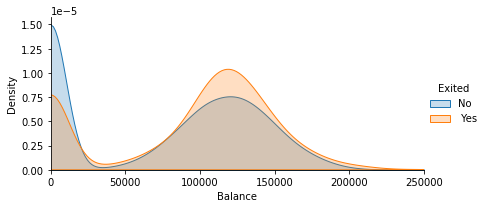

In [187]:
FacetGrid = sns.FacetGrid(data, hue='Exited', aspect=2,)
FacetGrid.map(sns.kdeplot, 'Balance', shade=True )
FacetGrid.set(xlim=(0, 250000))
FacetGrid.add_legend(labels = ['No', " Yes"])
plt.savefig('银行余额分布_1.png',dpi=300)

c:\users\m1070\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:156: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


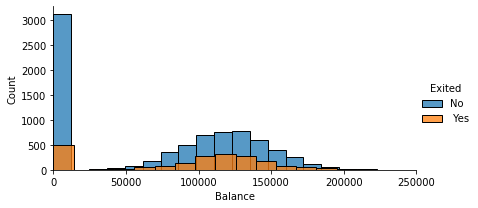

In [188]:
FacetGrid = sns.FacetGrid(data, hue='Exited', aspect=2,)
FacetGrid.map(sns.histplot, 'Balance')
FacetGrid.set(xlim=(0, 250000))
FacetGrid.add_legend(labels = ['No', " Yes"])
plt.savefig('银行余额分布_2.png',dpi=300)

c:\users\m1070\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:156: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


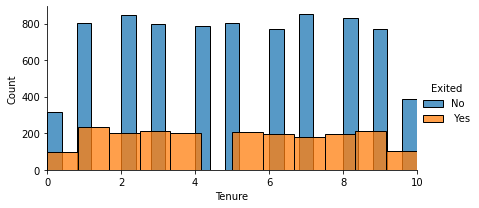

In [183]:
FacetGrid = sns.FacetGrid(data, hue='Exited', aspect=2,)
FacetGrid.map(sns.histplot, 'Tenure')
FacetGrid.set(xlim=(0, 10))
FacetGrid.add_legend(labels = ['No', " Yes"])
plt.savefig('注册年限_1.png',dpi=300)

In [3]:
X=X.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

In [2]:
X.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Female,Male,France,Germany,Spain,HasCrCard_Yes,HasCrCard_No,IsActiveMember_Yes,IsActiveMember_No
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881,0.454300,0.545700,0.501400,0.250900,0.247700,0.70550,0.29450,0.515100,0.484900
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818,0.497932,0.497932,0.500023,0.433553,0.431698,0.45584,0.45584,0.499797,0.499797
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.00000,1.000000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000,1.00000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000


In [8]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [3]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Female,Male,France,Germany,Spain,HasCrCard_Yes,HasCrCard_No,IsActiveMember_Yes,IsActiveMember_No
0,596.0,47.0,6.0,0.00,1.0,74835.65,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,614.0,50.0,4.0,137104.47,1.0,127166.49,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,587.0,49.0,7.0,155393.98,2.0,13308.20,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,616.0,45.0,3.0,143129.41,2.0,64327.26,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,850.0,40.0,6.0,97339.99,1.0,88815.25,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,580.0,67.0,3.0,153946.14,1.0,7418.92,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
9996,615.0,35.0,2.0,97440.02,2.0,139816.10,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
9997,549.0,29.0,3.0,0.00,2.0,146090.38,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
9998,724.0,34.0,6.0,118235.70,2.0,157137.23,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [32]:
########k折划分############        
def get_k_fold_data(k, i, X, y):  ###此过程主要是步骤（1）
    # 返回第i折交叉验证时所需要的训练和验证数据，分开放，X_train为训练数据，X_valid为验证数据
    assert k > 1
    fold_size = X.shape[0] // k  # 每份的个数:数据总条数/折数（组数）
    X_train, y_train = pd.DataFrame(), pd.DataFrame()
    for j in range(k):
        ##idx 为每组 valid
        X_part = X.iloc[j * fold_size: (j + 1) * fold_size,:]
        y_part=y[j * fold_size: (j + 1) * fold_size]
        if j == i: ###第i折作valid
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = pd.concat([X_train, X_part], axis=1) #dim=0增加行数，竖着连接
            y_train = pd.concat([y_train, y_part], axis=1)
    print(X_train.shape,X_valid.shape)
    return X_train, y_train, X_valid,y_valid


def k_fold(k, X_train, y_train, num_epochs=3,learning_rate=0.001, weight_decay=0.1, batch_size=5):
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train) # 获取k折交叉验证的训练和验证数据
        ### 每份数据进行训练,体现步骤三####
        exit()
        
get_k_fold_data(5,1,X,Y)

(8000, 60) (2000, 15)


(      CreditScore   Age  Tenure    Balance  NumOfProducts  EstimatedSalary  \
 0           583.0  40.0     3.0       0.00            2.0         47728.00   
 1           527.0  37.0     5.0   93722.73            2.0        139093.73   
 2           621.0  36.0     7.0  116338.68            1.0        155743.48   
 3           682.0  43.0     7.0  111094.05            2.0         64679.30   
 4           576.0  28.0     1.0  119336.29            2.0         58976.85   
 ...           ...   ...     ...        ...            ...              ...   
 9995          NaN   NaN     NaN        NaN            NaN              NaN   
 9996          NaN   NaN     NaN        NaN            NaN              NaN   
 9997          NaN   NaN     NaN        NaN            NaN              NaN   
 9998          NaN   NaN     NaN        NaN            NaN              NaN   
 9999          NaN   NaN     NaN        NaN            NaN              NaN   
 
       Female  Male  France  Germany  ...  Estimat

In [20]:
pd.DataFrame()

""


In [2]:
import numpy as np
import torch
cuda = True if torch.cuda.is_available() else False
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

z=np.random.normal(0,1,(4,2))
label=np.random.randint(0, 2, 4)
class_onehot = np.zeros((4, 2))
class_onehot[np.arange(4), label] = 1

torch.cat((Tensor(class_onehot),Tensor(z)),dim=1)
label

array([0, 1, 0, 0])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]